In [1]:
%pip install ollama pandas matplotlib seaborn scikit-learn python-dotenv requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Student\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv
import ollama  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
load_dotenv()

True

In [4]:
df = pd.read_csv("emotion-labels-val.csv")

In [5]:
print("Primeras filas del dataset:")
print(df.head())
print("\nEmociones únicas:", df["label"].unique())

Primeras filas del dataset:
                                                text label
0  @theclobra lol I thought maybe, couldn't decid...   joy
1  Nawaz Sharif is getting more funnier than @kap...   joy
2  Nawaz Sharif is getting more funnier than @kap...   joy
3  @tomderivan73 😁...I'll just people watch and e...   joy
4  I love my family so much #lucky #grateful #sma...   joy

Emociones únicas: ['joy' 'fear' 'anger' 'sadness']


In [6]:
emotion_map = {'joy': 0, 'fear': 1, 'anger': 2, 'sadness': 3}
df["label_num"] = df["label"].map(emotion_map)

In [7]:
def predict_with_ollama(text):
    prompt = f"""
    Clasifica la emoción del siguiente texto en una de estas opciones: joy, fear, anger, sadness.
    Devuelve SOLO la palabra clave en minúsculas.

    Texto: "{text}"
    Emoción:"""
    
    try:
        response = ollama.generate(
            model="llama3",  
            prompt=prompt,
            options={"temperature": 0.0}  
        )
        return response["response"].strip().lower()
    except Exception as e:
        print(f"Error al llamar a Ollama: {e}")
        return "error"

In [8]:
sample_df = df.sample(10, random_state=42)
sample_df["ollama_pred"] = sample_df["text"].apply(predict_with_ollama)  

sample_df.to_csv("predictions_ollama.csv", index=False)
print("\nPredicciones guardadas en 'predictions_ollama.csv'")


Predicciones guardadas en 'predictions_ollama.csv'


In [9]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=list(emotion_map.keys()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=emotion_map.keys(), 
                yticklabels=emotion_map.keys())
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()

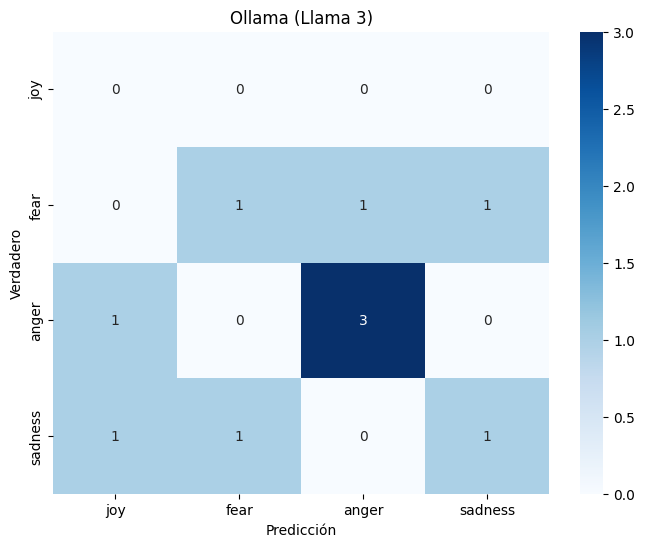


Reporte de clasificación:
              precision    recall  f1-score   support

       anger       0.75      0.75      0.75         4
        fear       0.50      0.33      0.40         3
         joy       0.00      0.00      0.00         0
     sadness       0.50      0.33      0.40         3

    accuracy                           0.50        10
   macro avg       0.44      0.35      0.39        10
weighted avg       0.60      0.50      0.54        10



C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565

In [10]:
valid_samples = sample_df[sample_df["ollama_pred"] != "error"]

if not valid_samples.empty:
    plot_confusion_matrix(valid_samples["label"], valid_samples["ollama_pred"], "Ollama (Llama 3)")
    print("\nReporte de clasificación:")
    print(classification_report(valid_samples["label"], valid_samples["ollama_pred"]))
else:
    print(" No hay predicciones válidas para evaluar.")

### Modelo 2

In [ ]:

def predict_with_mistral(text):
    prompt = f"""
    Clasifica la emoción del siguiente texto en: joy, fear, anger, sadness.
    Devuelve SOLO la palabra clave en minúsculas.

    Texto: "{text}"
    Emoción:"""
    
    response = ollama.generate(
        model="mistral",  
        prompt=prompt,
        options={"temperature": 0.0}
    )
    return response["response"].strip().lower()


sample_df["mistral_pred"] = sample_df["text"].apply(predict_with_mistral)  

In [16]:
print("Columnas en sample_df:", sample_df.columns.tolist())

Columnas en sample_df: ['text', 'label', 'label_num', 'ollama_pred', 'mistral_pred']


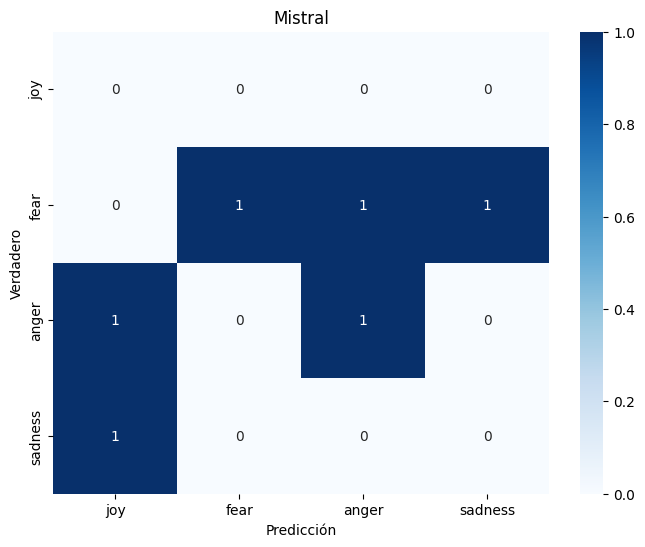

🔹 Llama 3:
              precision    recall  f1-score   support

       anger       0.75      0.75      0.75         4
        fear       0.50      0.33      0.40         3
         joy       0.00      0.00      0.00         0
     sadness       0.50      0.33      0.40         3

    accuracy                           0.50        10
   macro avg       0.44      0.35      0.39        10
weighted avg       0.60      0.50      0.54        10


🔹 Mistral:
                                                                                          precision    recall  f1-score   support

                                                                                   anger       0.50      0.25      0.33         4
                                                                                    fear       1.00      0.33      0.50         3
                                                                          fuming (angry)       0.00      0.00      0.00         0
                     

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565

In [ ]:

plot_confusion_matrix(sample_df["label"], sample_df["mistral_pred"], "Mistral")


print("🔹 Llama 3:")
print(classification_report(sample_df["label"], sample_df["ollama_pred"]))
print("\n🔹 Mistral:")
print(classification_report(sample_df["label"], sample_df["mistral_pred"]))